# Results Analysis

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import utils.visualization_utils as plot_utils 

import itertools

path = "./results/"
ml_models = ['knn', 'rf', 'sgd']
subset_types = ['base', 'complete', 'sub']
preprocessing_types=['no_scaling', 'standard_scaling', 'minmax_scaling']


## Classic machine learning models


In [2]:
ml_results = pd.DataFrame()

for model_name in ml_models:
    ml_results = ml_results.append(pd.read_csv(f'{path}{model_name}_results.csv'))

ml_results = ml_results.drop("Unnamed: 0",axis=1).reset_index(drop=True)

print(f'Training classic machine learning models: {ml_results.shape[0]} results')
ml_results.head(2)

Training classic machine learning models: 27 results


,model_type,dataset_type,preprocessing_type,params,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
0,knn,base,no_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.399870,0.363572,0.000135,0.000141,0.011622,0.011889,0.669082,0.673178
1,knn,base,standard_scaling,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.398843,0.359781,0.000135,0.000142,0.011632,0.011925,0.667766,0.675080


### K-Nearest Neighbors Regressor

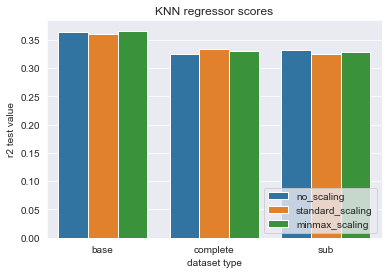

In [3]:
knn_results=ml_results[ml_results['model_type'] == 'knn']
plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data=knn_results, model_name='KNN regressor')

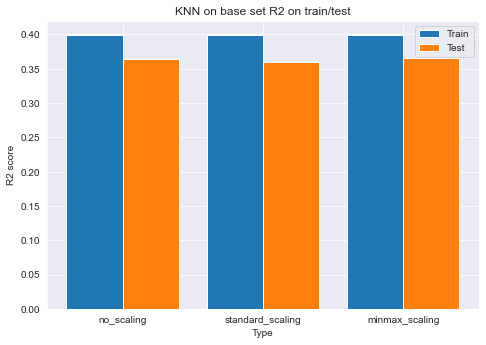

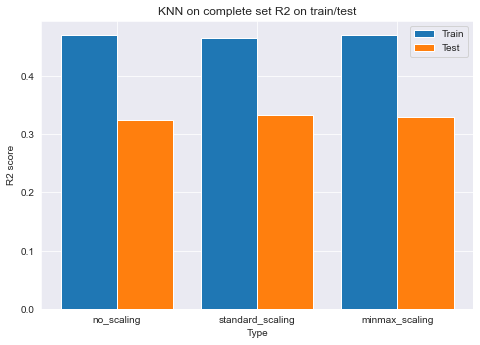

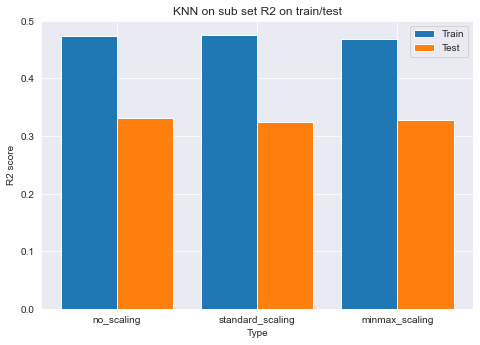

In [4]:
for set_type in subset_types:
    result = knn_results[knn_results['dataset_type'] == set_type]
    plot_utils.train_test_bar_plot(result['r2_train'], result['r2_test'], preprocessing_types, 'R2 score', f'KNN on {set_type} set R2 on train/test')

### Random forest regressor

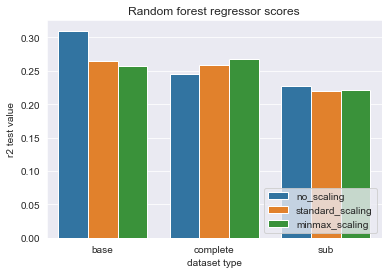

In [5]:
rf_results = ml_results[ml_results['model_type'] == 'rf']
plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data= rf_results, model_name='Random forest regressor')

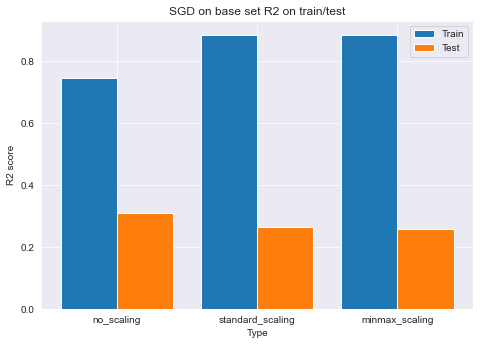

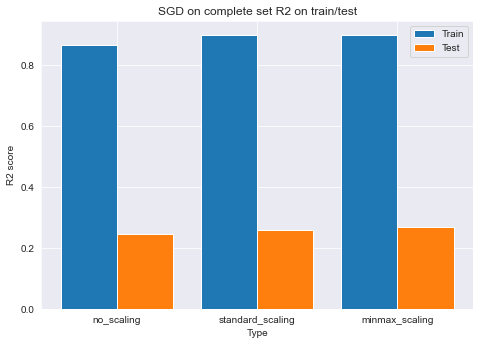

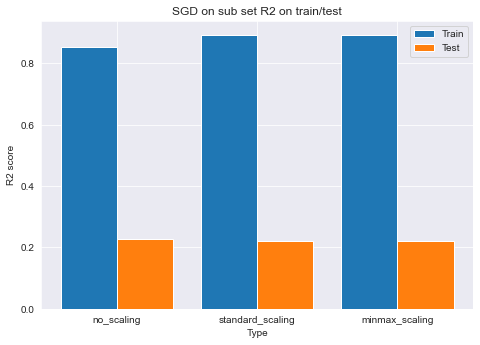

In [6]:
for set_type in subset_types:
    result = rf_results[rf_results['dataset_type'] == set_type]
    plot_utils.train_test_bar_plot(result['r2_train'], result['r2_test'], preprocessing_types, 'R2 score', f'SGD on {set_type} set R2 on train/test')

### Stochastic gradient descend regressor

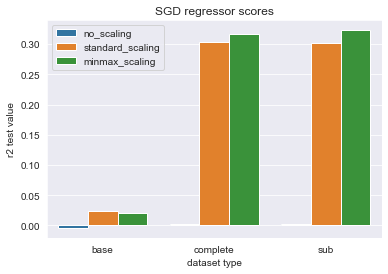

In [7]:
sgd_results = ml_results[ml_results['model_type'] == 'sgd']
plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data= sgd_results, model_name='SGD regressor', legend_pos="upper left")

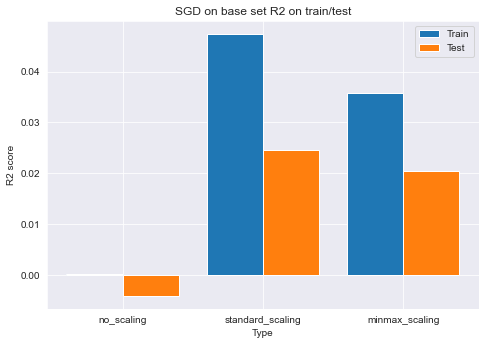

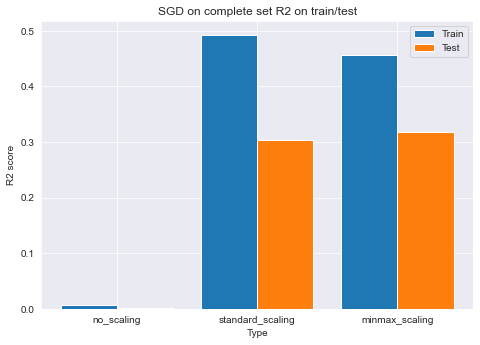

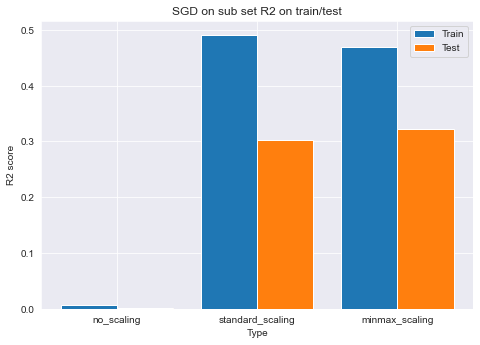

In [8]:
for set_type in subset_types:
    result = sgd_results[sgd_results['dataset_type'] == set_type]
    plot_utils.train_test_bar_plot(result['r2_train'], result['r2_test'], preprocessing_types, 'R2 score', f'SGD on {set_type} set R2 on train/test')

## Neural networks results

In [9]:
nn_results = pd.DataFrame()

for subset_type in subset_types:
    nn_results = nn_results.append(pd.read_csv(f'{path}neural_network_{subset_type}set.csv'))

nn_results = nn_results.drop("Unnamed: 0",axis=1).reset_index(drop=True)

print(f'Training neural network: {nn_results.shape[0]} results')
nn_results.head(2)

Training neural network: 1092 results


,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
0,neural_network,base,no_scaling,"{'hs': 100, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.00023147567900685736, 0.0002282007805591162...","[0.00028920447221025825, 0.0002889244060497731...",0.023870,0.005153,0.000220,0.000221,0.014823,0.014865,3165.8533,821.07340
1,neural_network,base,no_scaling,"{'hs': 100, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.0020520701073110104, 0.0017489216003853541,...","[0.0014486503787338734, 0.002717218128964305, ...",-0.137159,-0.185583,0.000256,0.000263,0.015999,0.016227,3797.4985,1013.76025


## Best training values
#get best best r2 values for each dataset type / preprocessing type

In [10]:
nn_results.sort_values(by=['r2_test'], ascending=False).head(1)

,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
880,neural_network,sub,minmax_scaling,"{'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b...","[0.0007498356448755098, 0.00020477936665814085...","[0.00021449897030834109, 0.0002155593392672017...",0.445773,0.336833,0.000125,0.000147,0.011169,0.012136,3758.821,933.0376


In [11]:
best_r2_train = nn_results.sort_values(by=['r2_train'], ascending=False).head(1)
print('Best params: {0} with {1}set and {2} preprocessing'.format(best_r2_train['params'].values[0], best_r2_train['dataset_type'].values[0], best_r2_train['preprocessing_type'].values[0]))

best_r2_train

Best params: {'hs': 200, 'n_layers': 2, 'n_epochs': 1000, 'b_size': 256, 'l_rate': 0.1, 'gamma': 0.03, 'dropout': 0} with subset and minmax_scaling preprocessing


,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
960,neural_network,sub,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 1000, '...","[0.00035834543366665737, 0.0003005121308468425...","[0.00024092946841847152, 0.0001894332090159878...",0.49021,0.291978,0.000115,0.000157,0.010712,0.01254,3824.5444,947.9064



    BEST PARAMS:
        Base set: {'hs': 200, 'n_layers': 2, 'n_epochs': 1000, 'b_size': 256, 'l_rate': 0.1, 'gamma': 0.03, 'dropout': 0}
        Complete set: {'hs': 200, 'n_layers': 3, 'n_epochs': 500, 'b_size': 512, 'l_rate': 0.1, 'gamma': 0.05, 'dropout': 0}
        Sub set: {'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b_size': 256, 'l_rate': 0.1, 'gamma': 0.03, 'dropout': 0}
    
    


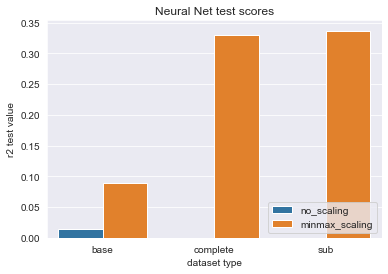

In [32]:
# for each couple (dataset type, preprocessing type) get the best test value
nn_best_results = pd.DataFrame()

for sub_type, pr_type in itertools.product(subset_types, ['no_scaling', 'minmax_scaling']):
    to_mantain = (nn_results['dataset_type'] == sub_type) & (nn_results['preprocessing_type'] == pr_type)
    
    nn_best_results = nn_best_results.append(nn_results[to_mantain].sort_values(by=['r2_test'], ascending=False).head(1))

print(
    f'''
    BEST PARAMS with minmax scaling:
        Base set: {nn_best_results[nn_best_results['dataset_type'] == 'base']['params'].values[0]}
        Complete set: {nn_best_results[nn_best_results['dataset_type'] == 'complete']['params'].values[0]}
        Sub set: {nn_best_results[nn_best_results['dataset_type'] == 'sub']['params'].values[0]}
    
    '''
)

plot_utils.grouped_bar_plot(x='dataset_type', y='r2_test', hue='preprocessing_type', data=nn_best_results, model_name='Neural Net test')



,model_type,dataset_type,preprocessing_type,params,mean_mse_epochs,last_mse_epochs,r2_train,r2_test,mse_train,mse_test,rmse_train,rmse_test,rae_train,rae_test
166,neural_network,base,minmax_scaling,"{'hs': 200, 'n_layers': 2, 'n_epochs': 500, 'b...","[0.001663011307495513, 0.0002736277924019045, ...","[0.0003873627574648708, 0.00023087621957529336...",0.112814,0.088707,0.000200,0.000202,0.014131,0.014227,3344.0283,864.3954
578,neural_network,complete,minmax_scaling,"{'hs': 200, 'n_layers': 3, 'n_epochs': 500, 'b...","[0.00022858001466374844, 0.0002186827228537627...","[0.00030527639319188893, 0.0002863445261027664...",0.447061,0.329975,0.000124,0.000149,0.011156,0.012199,3755.7227,933.9575
880,neural_network,sub,minmax_scaling,"{'hs': 50, 'n_layers': 3, 'n_epochs': 1000, 'b...","[0.0007498356448755098, 0.00020477936665814085...","[0.00021449897030834109, 0.0002155593392672017...",0.445773,0.336833,0.000125,0.000147,0.011169,0.012136,3758.8210,933.0376


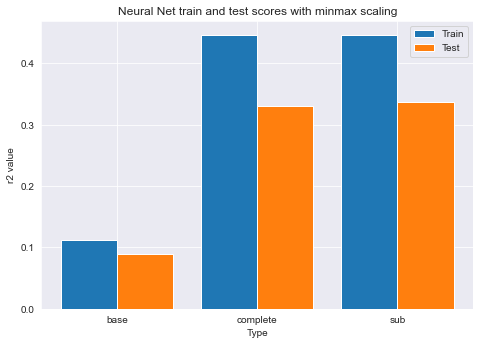

In [31]:
nn_best_results = nn_best_results[nn_best_results['preprocessing_type'] == 'minmax_scaling']

plot_utils.train_test_bar_plot(nn_best_results['r2_train'], nn_best_results['r2_test'], subset_types, 'r2 value', 'Neural Net train and test scores with minmax scaling')

nn_best_results

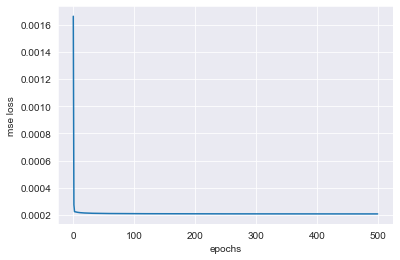

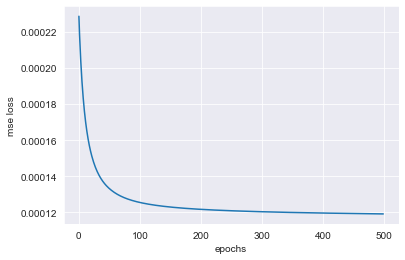

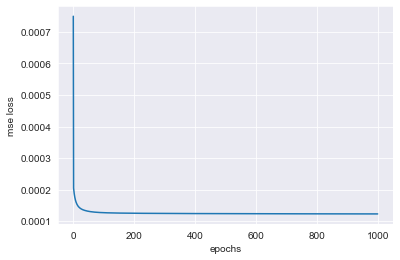

In [25]:
# results are in thos way because of dropout at 0

import ast

for index, row in nn_best_results.iterrows():
    plot_utils.plot_loss(ast.literal_eval(row['mean_mse_epochs']), ast.literal_eval(row['params']), 'mse', to_save=False)
    plt.show()
    